In [19]:
%matplotlib inline
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import leastsq
from scipy.linalg import inv, svd
from scipy.stats import linregress

# Multivariate Gaussian distrubution

### generate random data

In [2]:
np.random.seed(1) # random seed for consistency
N = 50
cov_eigenvalues = [1, 10]

angle = 10
theta = (angle/180.) * np.pi
rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                      [np.sin(theta),  np.cos(theta)]])

cov_mat = np.matrix([[1, 0],[0, 10]]) * rotMatrix
all_samples = np.random.multivariate_normal([15, 10], cov_mat, N)
X = np.matrix(np.hstack([np.ones((N, 1)), all_samples[:, 0:1]]))
y = np.matrix(all_samples[:, 1:2])
print X.shape

(50, 2)


### plot data with original cluster colors

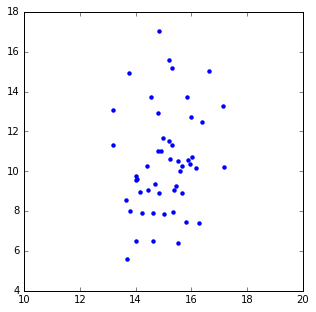

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,1], y, s=20, alpha=1, linewidth=0)
ax.set_xlim(10, 20)
ax.set_ylim(4, 18)
plt.show()

### Performing Ordinary Least Squares

(50, 2)
(50, 1)
(50, 1)


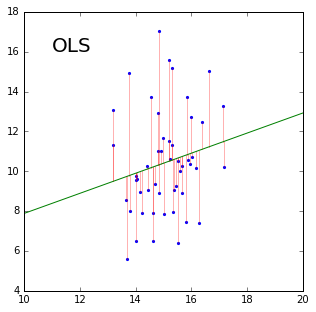

In [4]:
beta = inv(X.T*X) * X.T * y

y_pred = X*beta
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,1], y, s=10, alpha=1, linewidth=0)
for i in xrange(X.shape[0]):
    ax.plot([X[i,1], X[i,1]], [y[i,0], y_pred[i,0]], 'r-', alpha=0.3)

X_new = np.matrix([[1, 10], [1, 20]])
y_pred_new = X_new*beta
ax.plot(X_new[:,1], y_pred_new, 'g-')
ax.set_xlim(10, 20)
ax.set_ylim(4, 18)
ax.text(11, 16, 'OLS', fontsize=20)

plt.show()

### Performing Total Least Squares

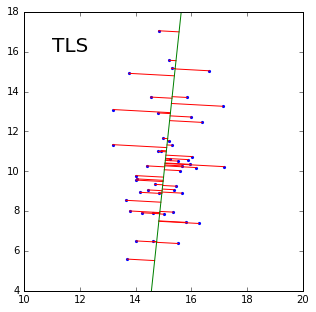

In [5]:
Xy = np.hstack([X, y])
mu_Xy = np.mean(Xy, 0)

Xy_centered = Xy - np.ones((N, 1)) * mu_Xy # subtract the mean from each sample
eig_vec, eig_val, _ = svd(Xy_centered.T)
n = eig_vec[:, 0:1]

project = lambda X : X * (n.T*n) + np.ones((X.shape[0], 1)) * mu_Xy
Xy_projected = project(Xy_centered)

X_new = project(np.matrix([[1, 0, -8], [1, 0, 8]]))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(Xy[:,1], Xy[:, 2], s=10, alpha=1, linewidth=0)
for i in xrange(N):
    ax.plot([Xy[i,1], Xy_projected[i,1]], [Xy[i,2], Xy_projected[i,2]], 'r-')

ax.plot(X_new[:,1], X_new[:,2], 'g-')
ax.set_xlim(10, 20)
ax.set_ylim(4, 18)
ax.text(11, 16, 'TLS', fontsize=20)

plt.show()


# example with bimodal distribution

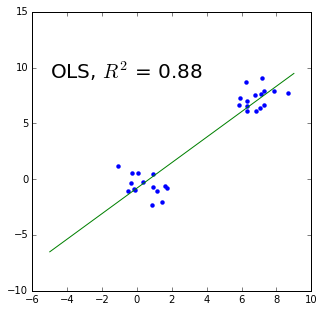

In [34]:
np.random.seed(1) # random seed for consistency
N2 = 30

class1_sample = np.random.multivariate_normal(np.array([0,0]), np.eye(2), N2/2).T
class2_sample = np.random.multivariate_normal(np.array([7,7]), np.eye(2), N2/2).T
all_samples2 = np.hstack((class1_sample, class2_sample)).T
X2 = np.matrix(np.hstack([np.ones((N2, 1)), all_samples2[:, 0:1]]))
y2 = np.matrix(all_samples2[:, 1:2])

beta2 = inv(X2.T*X2) * X2.T * y2

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
X2_new = np.matrix([[1, -5], [1, 9]])
y2_pred_new = X2_new*beta2

ax.scatter(X2[:,1], y2, s=20, alpha=1, linewidth=0)
ax.plot(X2_new[:,1], y2_pred_new, 'g-')
slope, intercept, r_value, p_value, std_err = linregress(X2[:, 1].flat, y2.flat)
ax.text(-5, 9, 'OLS, $R^2$ = %.2f' % (r_value**2), fontsize=20)

plt.show()